In [1]:
import os
import numpy as np
from gen1_preprocessor import Preprocessor
from gen1_classifier import Classifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import glob

In [2]:
preprocessor = Preprocessor(use_pca=False)
classifier = Classifier()
current_path = os.path.abspath('')
traning_set_path = os.path.join(current_path,"training")
testing_set_path = os.path.join(current_path,"training")

print (f'Traning Set:{traning_set_path}')
print (f'Testing Set:{testing_set_path}')

Traning Set:/workspace/training
Testing Set:/workspace/training


In [3]:
x_traning,y_traning = preprocessor.load_training_data(traning_set_path,limit=None)
x_traning.shape

load data src:/workspace/training, limit:None


(5802, 12420)

In [4]:
#test_data,y_test = preprocessor.load_testing_data(testing_set_path,limit=1000,hasLabel=True)
test_count = 700
test_data,y_test = x_traning[:test_count],y_traning[:test_count]
x,y =x_traning[test_count:,:],y_traning[test_count:]

classifier.fit(x,y)
y_test_predictions = classifier.predict(test_data)
y_test_predict_probabilities = classifier.predict_proba(test_data)

Accuracy: 0.8485714285714285
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       452
           1       0.87      0.67      0.76       248

    accuracy                           0.85       700
   macro avg       0.86      0.81      0.82       700
weighted avg       0.85      0.85      0.84       700

(700,)
(700,)


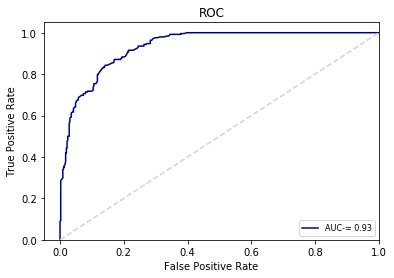

In [5]:
print ('Accuracy:',(y_test_predictions == y_test).sum().astype(float)/(y_test.shape[0]))
print ('Classification report:')
print (classification_report(y_test, y_test_predictions))
print(y_test.shape)
print(y_test_predictions.shape)
#Not sure if this is correct to map score 
y_score = y_test_predict_probabilities[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c='navy', label=('AUC-'+'= %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
x,y=x_traning[:1000],y_traning[:1000]
n_options = (10,30,100)
for n in n_options:
    classifier = Classifier(n_estimators=n)
    score = cross_validate(classifier.model,x,y,cv=5,scoring=('roc_auc'))
    print(n)
    print(score)

{'fit_time': array([2.76369119, 2.7999177 , 2.85075998, 2.77756071, 2.79866385]),
 'score_time': array([0.03608799, 0.03619838, 0.03962398, 0.03550482, 0.03588748]),
 'test_score': array([0.9082879 , 0.90223555, 0.91472527, 0.88717949, 0.87954292])}

In [9]:
classifier = Classifier(qq=100)

TypeError: __init__() got an unexpected keyword argument 'qq'